In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('test.csv', sep='\t')

In [4]:
df.head(n=10)

,BU,OII Related,RateOfOII,Login Related Flag,Number of Records,OFFERING,RATING,REVIEW_TEXT,app_identifier,app_store,bank_flag,count,review_date,score,tag,title
0,CTG,0,0,False,1,My Refund,5,Great app,com.intuit.mobile.mytaxrefund,Google,0,NaN,2/10/2015,0,RATING ROLLUP,Great
1,CTG,0,0,False,1,TurboTax,5,Great,com.intuit.turbotax,Apple,0,NaN,1/17/2017,0,RATING ROLLUP,Great
2,SBG,0,0,False,1,QB Self Employed,3,Please include a way to clear all notification...,com.intuit.qbse,Apple,0,NaN,6/27/2017,0,RATING ROLLUP,Notifications!!!
3,CTG,0,0,False,1,TurboTax,1,I have been working on a efile for 9 days th...,com.intuit.turbotax.mobile,Google,0,NaN,3/8/2016,0,RATING ROLLUP,None
4,CTG,0,0,False,1,TurboTax,1,It now forces you to pay 30 dollars if you wa...,com.intuit.turbotax.mobile,Google,0,NaN,1/20/2017,0,RATING ROLLUP,None
5,CEG,0,0,False,1,Mint,5,"Love it, keeps me organized and simple to use",com.mint.internal,Apple,0,NaN,1/3/2016,0,RATING ROLLUP,Love it
6,CEG,0,0,False,1,Mint Bills,4,"By far my favorite financial app, makes everyt...",com.pageonce.ionce,Apple,0,NaN,5/23/2015,0,RATING ROLLUP,Love it
7,SBG,0,0,False,1,QBMobile,5,I used MYOB for years and naturally moved to e...,com.intuit.QBOiPad,Apple,0,NaN,10/9/2016,0,RATING ROLLUP,So much better than MYOB
8,CEG,0,0,False,1,Mint,5,I love the reminders when bills are coming due.,com.netgate,Google,1,NaN,6/30/2014,0,RATING ROLLUP,Great help
9,CEG,0,0,False,1,Mint,3,"Looks promising but a number of my accounts, t...",com.mint,Google,1,NaN,1/6/2018,0,RATING ROLLUP,None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155161 entries, 0 to 155160
Data columns (total 16 columns):
BU                    155161 non-null object
OII Related           155161 non-null int64
RateOfOII             155161 non-null int64
Login Related Flag    155161 non-null bool
Number of Records     155161 non-null int64
OFFERING              155161 non-null object
RATING                155161 non-null int64
REVIEW_TEXT           155161 non-null object
app_identifier        155161 non-null object
app_store             155161 non-null object
bank_flag             155161 non-null int64
count                 0 non-null float64
review_date           155161 non-null object
score                 155161 non-null int64
tag                   155161 non-null object
title                 154955 non-null object
dtypes: bool(1), float64(1), int64(6), object(8)
memory usage: 17.9+ MB


In [6]:
df.describe()

,OII Related,RateOfOII,Number of Records,RATING,bank_flag,count,score
count,155161.000000,155161.000000,155161.0,155161.000000,155161.000000,0.0,155161.000000
mean,0.024678,0.024678,1.0,4.042872,0.257043,NaN,0.032321
std,0.155141,0.155141,0.0,1.449362,0.437005,NaN,0.227421
min,0.000000,0.000000,1.0,0.000000,0.000000,NaN,0.000000
25%,0.000000,0.000000,1.0,4.000000,0.000000,NaN,0.000000
50%,0.000000,0.000000,1.0,5.000000,0.000000,NaN,0.000000
75%,0.000000,0.000000,1.0,5.000000,1.000000,NaN,0.000000
max,1.000000,1.000000,1.0,5.000000,1.000000,NaN,5.000000


In [7]:
df['text_length'] = df['REVIEW_TEXT'].apply(len)

## EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

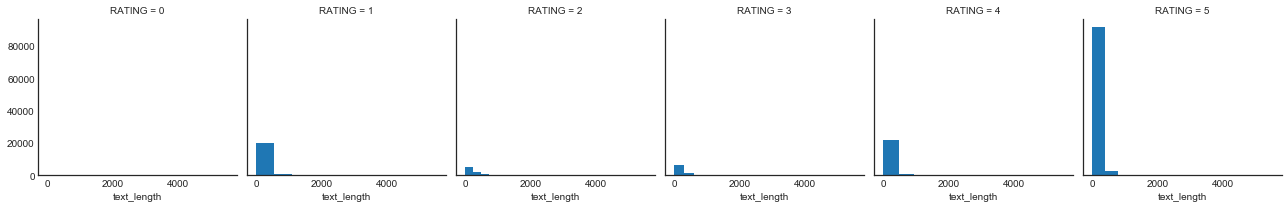

In [9]:
g = sns.FacetGrid(df, col='RATING')
g.map(plt.hist, 'text_length')